<a href="https://colab.research.google.com/github/ghosesuvendu/dataScience/blob/main/Salary_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Salary_Data.csv']))

In [ ]:
data.shape

(30, 2)

In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [ ]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_train_pred = model.predict(x_train)

<function matplotlib.pyplot.show>

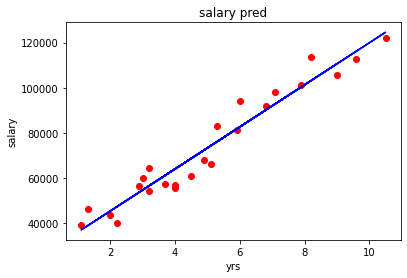

In [ ]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, y_train_pred, color='blue')
plt.title("salary pred")
plt.xlabel("yrs")
plt.ylabel("salary")
plt.show

<function matplotlib.pyplot.show>

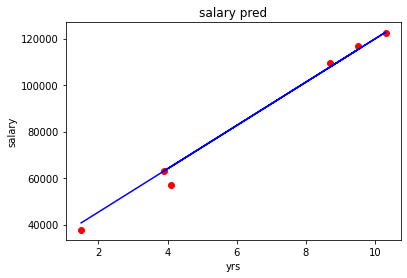

In [ ]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, y_pred, color='blue')
plt.title("salary pred")
plt.xlabel("yrs")
plt.ylabel("salary")
plt.show

In [ ]:
df = pd.DataFrame({"test": y_test, "pred": y_pred})
df.head()

,test,pred
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.988169515729126

In [ ]:
model.coef_

array([9312.57512673])

In [ ]:
model.intercept_

26780.09915062818

In [ ]:
import statsmodels.api as sm
x1_train = sm.add_constant(x_train)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x1_train

array([[ 1. ,  9.6],
       [ 1. ,  4. ],
       [ 1. ,  5.3],
       [ 1. ,  7.9],
       [ 1. ,  2.9],
       [ 1. ,  5.1],
       [ 1. ,  3.2],
       [ 1. ,  4.5],
       [ 1. ,  8.2],
       [ 1. ,  6.8],
       [ 1. ,  1.3],
       [ 1. , 10.5],
       [ 1. ,  3. ],
       [ 1. ,  2.2],
       [ 1. ,  5.9],
       [ 1. ,  6. ],
       [ 1. ,  3.7],
       [ 1. ,  3.2],
       [ 1. ,  9. ],
       [ 1. ,  2. ],
       [ 1. ,  1.1],
       [ 1. ,  7.1],
       [ 1. ,  4.9],
       [ 1. ,  4. ]])

In [ ]:
model1 = sm.OLS(y_train, x1_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     352.1
Date:                Thu, 02 Sep 2021   Prob (F-statistic):           5.03e-15
Time:                        11:25:12   Log-Likelihood:                -242.89
No. Observations:                  24   AIC:                             489.8
Df Residuals:                      22   BIC:                             492.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.678e+04   2818.687      9.501      0.0